<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Tarea5/KernelRidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mínimos cuadrados para regresión y su extensión no lineal**

[sklearn.linear model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Regresor lineal por mínimos cuadrados

\begin{equation}
\omega^* = \arg\min_\omega \|y-Xw\|^2_2
\end{equation}


[sklearn.kernel ridge.KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)

Regresor rígido kernel



\begin{equation}
\omega^* = \arg\min_\omega \|y-\Phi \omega\|^2_2 + \alpha\|\omega\|^2_2
\end{equation}

\begin{equation}
\omega^* = (\Phi^\top \Phi+\alpha I)^{-1}\Phi^\top y
\end{equation}


\begin{equation}
\omega^* = \Phi^\top(\Phi \Phi^\top+\alpha I)^{-1}y = k(\cdot)^\top(K+\alpha I)^{-1}y
\end{equation}

##**Ejercicio 1**

- Presente la solución al problema de optimización kernel ridge (Ver [Kernel Ridge Regression](https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf) y [material de apoyo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/2_Kernels_GaussianProcess/1-introKernels.pdf) págs 8 y 9).

$$\Phi = B$$

$$R = I$$ $$P=?$$ factorizar para que quede $\alpha$

##**Solución - Ejercicio 1**

Sea un conjunto de datos con $N$ muestras y $D$ características:

$$
X \in \mathbb{R}^{N \times D}, \qquad
y \in \mathbb{R}^N,
$$

Buscamos el vector de pesos $w \in \mathbb{R}^D$ que minimiza el costo **Ridge**:

$$
\mathcal{L}(w)
= \frac{1}{2}\|y - Xw\|_2^2 + \frac{\lambda}{2}\|w\|_2^2.
$$

---
Tomando el gradiente de $\mathcal{L}(w)$ e igualándolo a cero:

$$
\nabla_w \mathcal{L}(w) = -X^\top(y - Xw) + \lambda w = 0
$$
Que resulta en la ecuación normal:
$$
(X^\top X + \lambda I_D)w = X^\top y.
$$

Así, la **solución primaria** es:

$$
\boxed{ w = (X^\top X + \lambda I_D)^{-1} X^\top y. } \tag{1}
$$

---

*Welling* cita la siguiente **identidad matricial** (2):

$$
\boxed{(P^{-1} + B^\top R^{-1} B)^{-1} B^\top R^{-1}
= P B^\top (B P B^\top + R)^{-1}}
\tag{2}
$$

Utilizaremos la identidad (2) para transformar la inversa de dimensión $D \times D$,
$$
(\Phi \Phi^\top + \lambda I_D)^{-1},
$$
en una inversa de dimensión $ N \times N $.

---

Escogemos:
$$
B = \Phi, \qquad R = I_N, \qquad P^{-1} = \lambda I_D \Rightarrow P = \lambda^{-1} I_D.
$$

*(Equivalentemente se puede tomar $B = \Phi^\top$ dependiendo de si $\Phi$ se almacena como $D \times N$ o $N \times D$;
ambas convenciones llevan al mismo resultado con el mapeo $P = \lambda^{-1} I_D$.  
Aquí seguimos la notación de las notas de Welling, con $\Phi \in \mathbb{R}^{D \times N}$ para que $\Phi \Phi^\top$ sea $D \times D)$.*

---

Sustituimos $P = \lambda^{-1} I_D$, $B = \Phi$, y $R = I_N$.

**Lado izquierdo de (2):**

$$
(P^{-1} + B^\top R^{-1} B)^{-1} B^\top R^{-1}
= (\lambda I_D + \Phi \Phi^\top)^{-1} \Phi.
$$

**Lado derecho de (2):**

$$
P B^\top (B P B^\top + R)^{-1}
= \lambda^{-1} I_D \Phi^\top (\Phi (\lambda^{-1} I_D) \Phi^\top + I_N)^{-1}.
$$

---
Veamos que el término inicial es:
$$
\Phi (\lambda^{-1} I_D) \Phi^\top + I_N
= \lambda^{-1} (\Phi \Phi^\top + \lambda I_N),
$$
Por lo que su inversa es:

$$
(\Phi (\lambda^{-1} I_D) \Phi^\top + I_N)^{-1}
= \lambda (\Phi \Phi^\top + \lambda I_N)^{-1}.
$$

Sustituyendo de nuevo en el lado derecho:

$$
P B^\top (B P B^\top + R)^{-1}
= \lambda^{-1} \Phi^\top \big[ \lambda (\Phi \Phi^\top + \lambda I_N)^{-1} \big]
= \Phi^\top (\Phi \Phi^\top + \lambda I_N)^{-1}.
$$

Por tanto, la identidad (2) verifica la igualdad:

$$
(\lambda I_D + \Phi \Phi^\top)^{-1} \Phi
= \Phi^\top (\Phi \Phi^\top + \lambda I_N)^{-1}.
$$

---

Comenzamos con la forma primaria **(A)**:

$$
w = (\Phi \Phi^\top + \lambda I_D)^{-1} \Phi y.
$$

Aplicando la igualdad anterior:

$$
w = \Phi^\top (\Phi \Phi^\top + \lambda I_N)^{-1} y.
$$

Definimos entonces:

$$
\alpha := (\Phi^\top \Phi + \lambda I_N)^{-1} y,
$$
por lo que la **representación dual (B)** es:

$$
\boxed{
w = \Phi \alpha, \qquad
\alpha = (K + \lambda I_N)^{-1} y.
}
$$

---

Esto demuestra que la forma (A), el problema primeria de Ridge, y la forma (B),la representación dual en términos del kernel, son algebraicamente equivalentes, y que la **identidad (2)** es el paso clave que permite mover la inversión entre los espacios de características y de muestras.

---

Por último, si consideramos una notación tipo ML, tendremos que:

$$
\phi = X^T, \qquad X \in \mathbb{R^{NxD}}
$$

Por lo que la representación primaria **(A)** será:

$$
w = (X^\top X + \lambda I_D)^{-1} X^\top y.
$$

Y la representación dual **(B)**:

$$
w = X^\top(X X^\top + \lambda I_D)^{-1}  y.
$$

##**Ejemplo**

- Se pretende generar un modelo de regresión bajo entradas con ruido blanco Gaussiano, con $\mu_\eta=0$, para seguir una función no lineal tipo sinc(x).

- $y = {\rm{sinc}}(x)+\eta$;  
con $\eta\sim p(\eta)=\mathscr{N}(\eta|\mu_\eta,\sigma_\eta^2)=\frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|_2^2}{2\sigma^2_\eta}\right)$

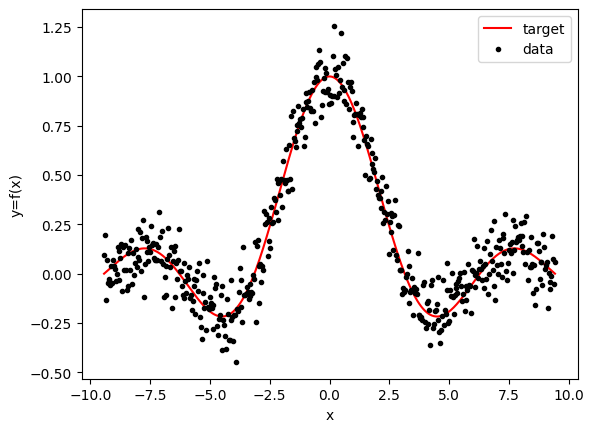

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 500 # Sample Number

X = np.linspace(-3*np.pi,3*np.pi,N) # Inout Vector
y = np.sinc(X/np.pi) # Objective Function (Sinc)

var = 0.01 # Noise Variance
mean = 0 # Noise Mean

noise = mean + np.sqrt(var)*np.random.randn(X.shape[0]) # White Gaussian Noise
yn = y + noise # Noisy Signal

plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

**Nota:** $${\rm{sinc}}(\theta)=\frac{\sin(\theta)}{\theta}$$

- Se crean los vectores de entrada y salida tipo aprendizaje de máquina.

In [71]:
y = yn.reshape(-1,1)
X = X.reshape(-1,1)
print(X.shape) # N = 500 muestras, P = 1 atributos
print(y.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


- Se entrenará un modelo de aprendizaje con scikitlearn

(375, 1)
(125, 1)


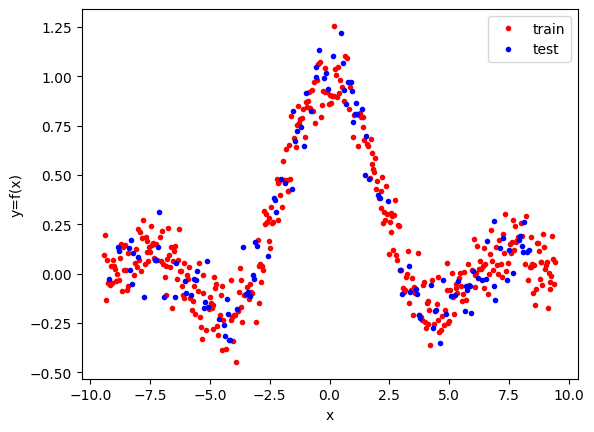

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

# Train and Test Partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)

print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

##**Bias-Variance Tradeoff**

La validación cruzada, o estrategias similares, nos permiten entender, al menos un poco, la capacidad de generalización de nuestro modelo:

## TotalError = Bias$^2$ + Variance + IrreducibleError

![bias_variance](https://media.geeksforgeeks.org/wp-content/uploads/20200107023418/1_oO0KYF7Z84nePqfsJ9E0WQ.png)

#**Kernel Rbf**

- Se utilizará el modelo [KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) con función kernel tipo radial basis function (rbf):


$$\kappa(x,x') = \exp\left(\frac{-\gamma\|x-x'\|^2_2}{2}\right)$$

**Nota:** el hiperparámetro $\gamma\in\mathbb{R}^+$ se conoce como precisión y pretende escalar la noción de parecido entre los puntos. La precisión se relaciona comunmente con el parámetro ancho de banda ("varianza") $\sigma\in\mathbb{R}^+$ del modelo rbf, según:

$$\gamma=\frac{1}{\sigma^2}$$

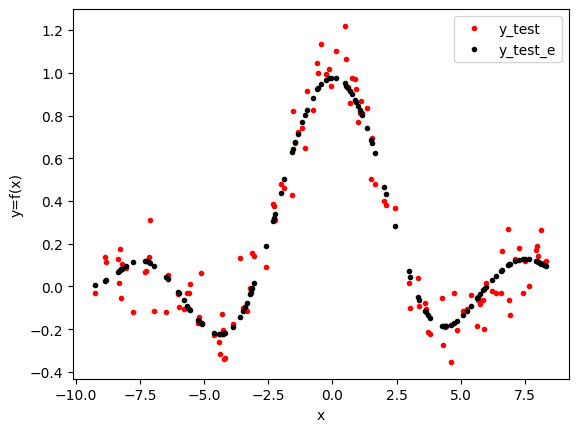

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline

gamma = 0.1     # Gamma
alpha = 0.01   # Regularization Value
reg = KernelRidge(kernel='rbf', gamma=gamma, alpha=alpha)
reg.fit(X_train,y_train)  # Fit only within Train Data

# Prediction
y_test_e = reg.predict(X_test)
y_train_e = reg.predict(X_train)

plt.plot(X_test,y_test,'r.',label='y_test' )
plt.plot(X_test,y_test_e,'k.',label='y_test_e')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

**NOTA:** Es  necesario encontar unos buenos hiperparámetros para seguir la función no lineal

In [74]:
steps=[('reg', KernelRidge(kernel = 'rbf'))]
parameters = {'reg__alpha' : [0, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
              'reg__gamma': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
              }

pipeline = Pipeline(steps = steps)

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=10,
                           scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(X_train, y_train)

# Best Trained Model
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits

Mejores parámetros:

{'reg__alpha': 0.001, 'reg__gamma': 0.1}


**NOTA:** Se evaluan los datos de entrenamiento y prueba con el mejor modelo encontrado.

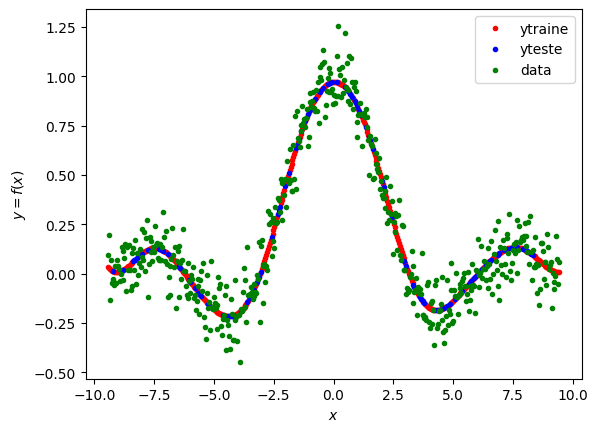

In [75]:
y_test_e = grid_search.best_estimator_.predict(X_test)
y_train_e = grid_search.best_estimator_.predict(X_train)

plt.plot(X_train, y_train_e, 'r.', label='ytraine' )
plt.plot(X_test, y_test_e, 'b.', label='yteste')
#plt.plot(X,y,'k',label='target' )
plt.plot(X,y,'g.',label='data' )

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.show()

##**Visualización de Kernel**

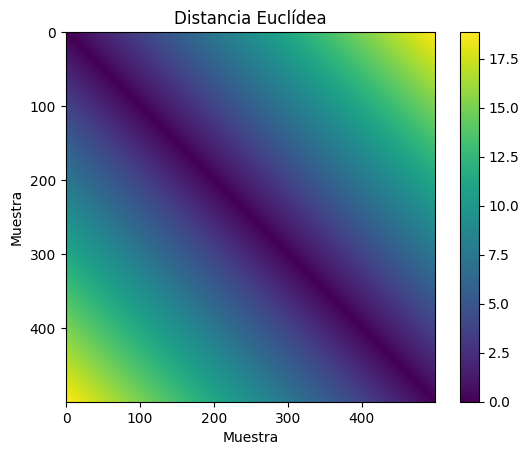

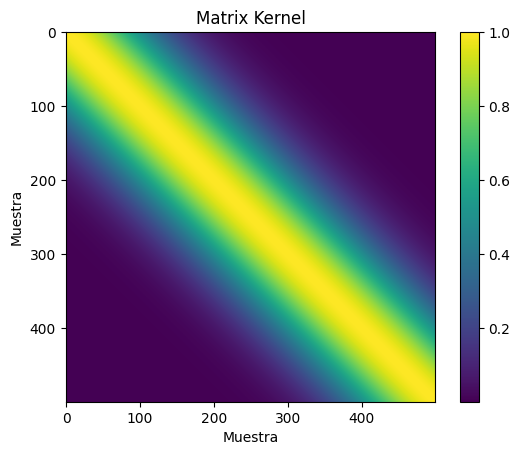

In [76]:
from sklearn.metrics import pairwise_distances as dist

D = dist(X.reshape(-1,1),X.reshape(-1,1)) # Dissimilarity
K = np.exp(-.5*gamma*D**2)
D.shape

plt.imshow(D)
plt.colorbar()
plt.xlabel('Muestra')
plt.ylabel('Muestra')
plt.title('Distancia Euclídea')
plt.show()

plt.imshow(K)
plt.colorbar()
plt.xlabel('Muestra')
plt.ylabel('Muestra')
plt.title('Matrix Kernel')
plt.show()

Recuerde que:

\begin{equation}
\kappa(x,x') = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\|x-x'\|_2^2}{2\sigma^2}\right) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\gamma\|x-x'\|_2^2}{2}\right)
\end{equation}

#**Ejercicio 2**

- Visualice el kernel rbf para diferentes condiciones de ruido sintonizando los hiperparámetros del modelo utilizando GridSearch y  BayesSearch. *Ayuda*: Modifique la varianza del ruido.

- Realice una descomposición en valores propios de la matriz kernel para cada una de las condiciones de ruido del punto anterior, qué puede discutir sobre el espectro de la matríz y su influencia en el modelo predictivo de kernel ridge?. Cuál es la relación entre el espectro visualizado y el hiperparámetro de regularización o penalidad encontrado por gridsearch en cada caso?. *Ayuda*: utilizando numpy encuentre la descomposición de valores y vectores propios de $\mathbf{K}$ y $\mathbf{K}+\alpha\mathbf{I}$, según los valores de $\gamma$ y $\alpha$ encontrados por BayessearchCV ante cada condición de ruido evaluada.




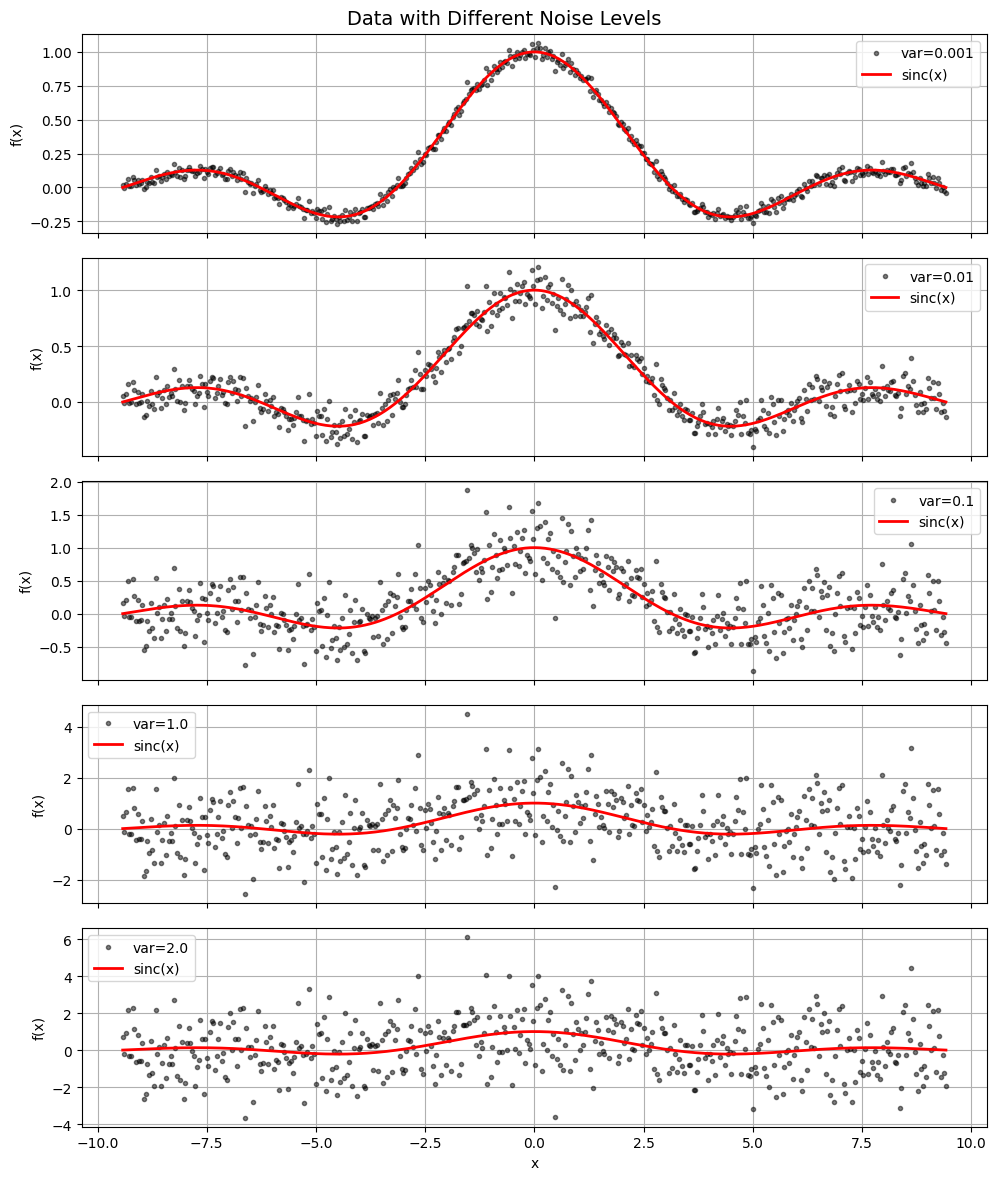

Noise Variance=0.001 → α=1.292e-03, γ=4.642e-02
Noise Variance=0.010 → α=1.668e-02, γ=4.642e-02
Noise Variance=0.100 → α=5.995e-02, γ=4.642e-02
Noise Variance=1.000 → α=7.743e-01, γ=4.642e-02
Noise Variance=2.000 → α=1.000e+01, γ=4.642e-02


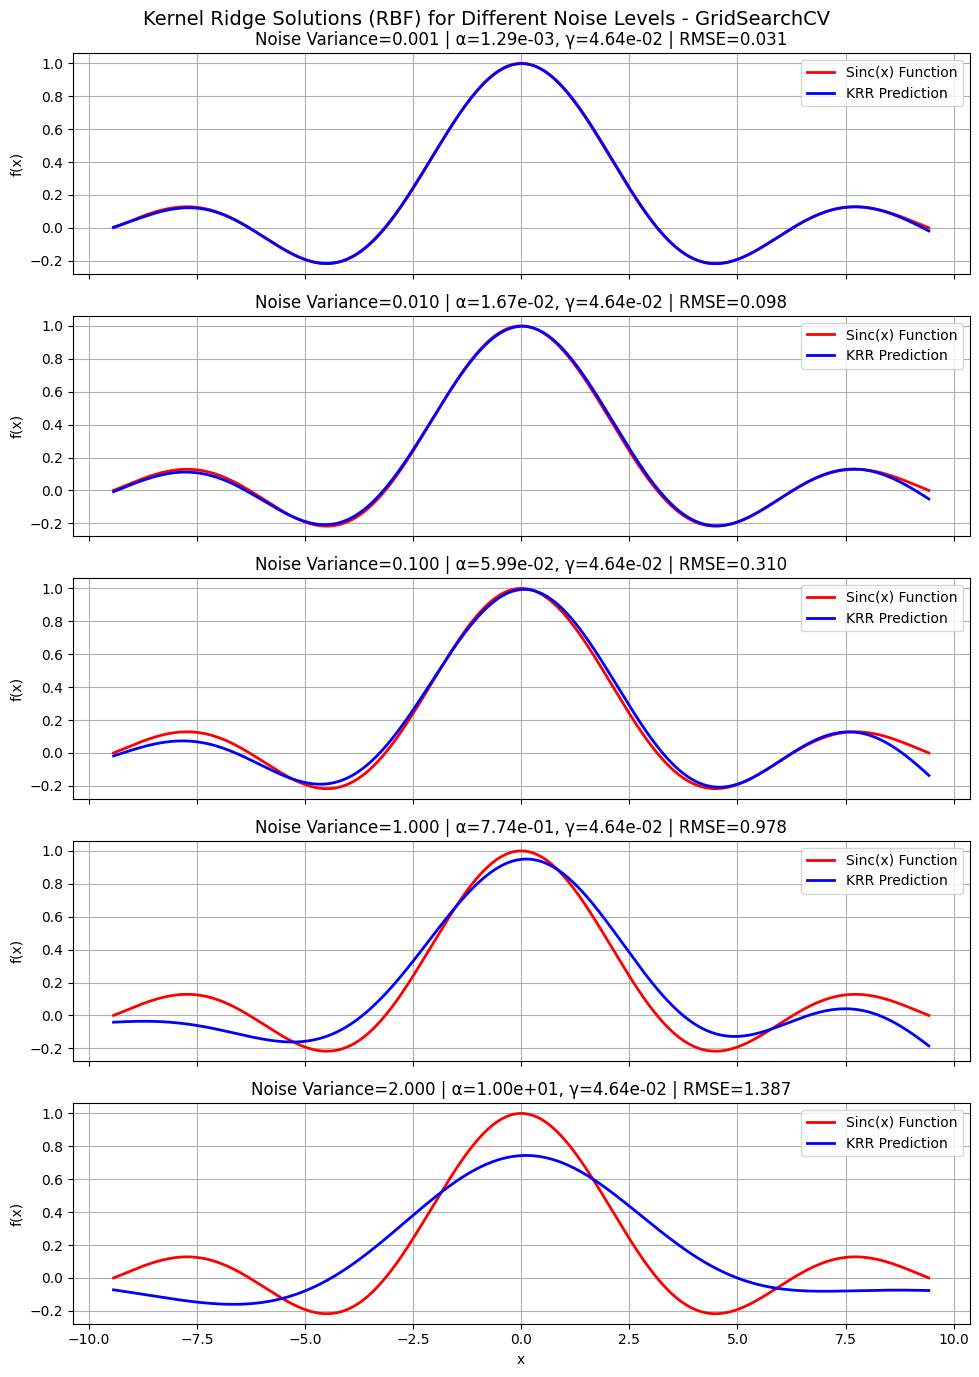

Noise Variance=0.001 → α=1.509e-03, γ=3.935e-02
Noise Variance=0.010 → α=1.000e-04, γ=6.508e-02
Noise Variance=0.100 → α=3.043e-03, γ=4.612e-02
Noise Variance=1.000 → α=1.000e+01, γ=2.190e-01
Noise Variance=2.000 → α=1.000e+01, γ=6.813e-02


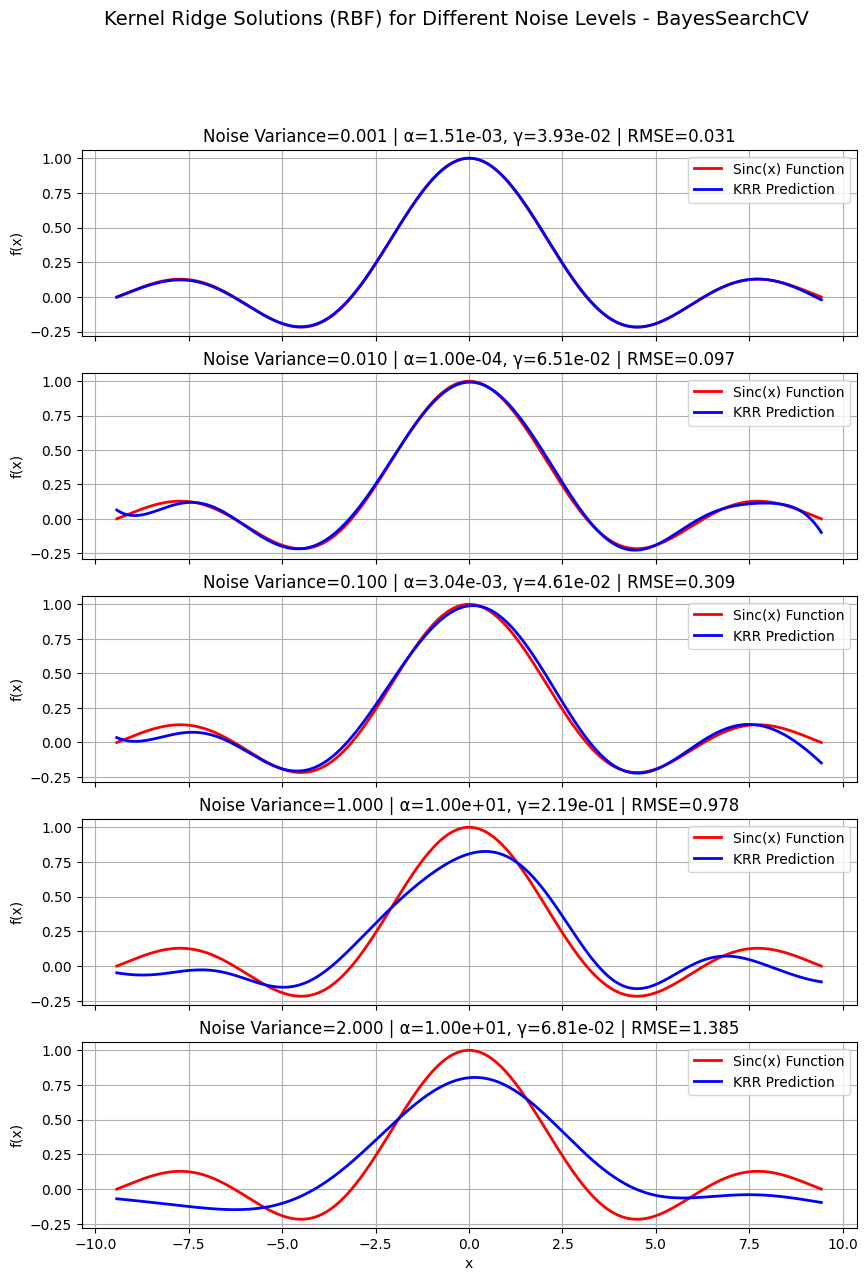

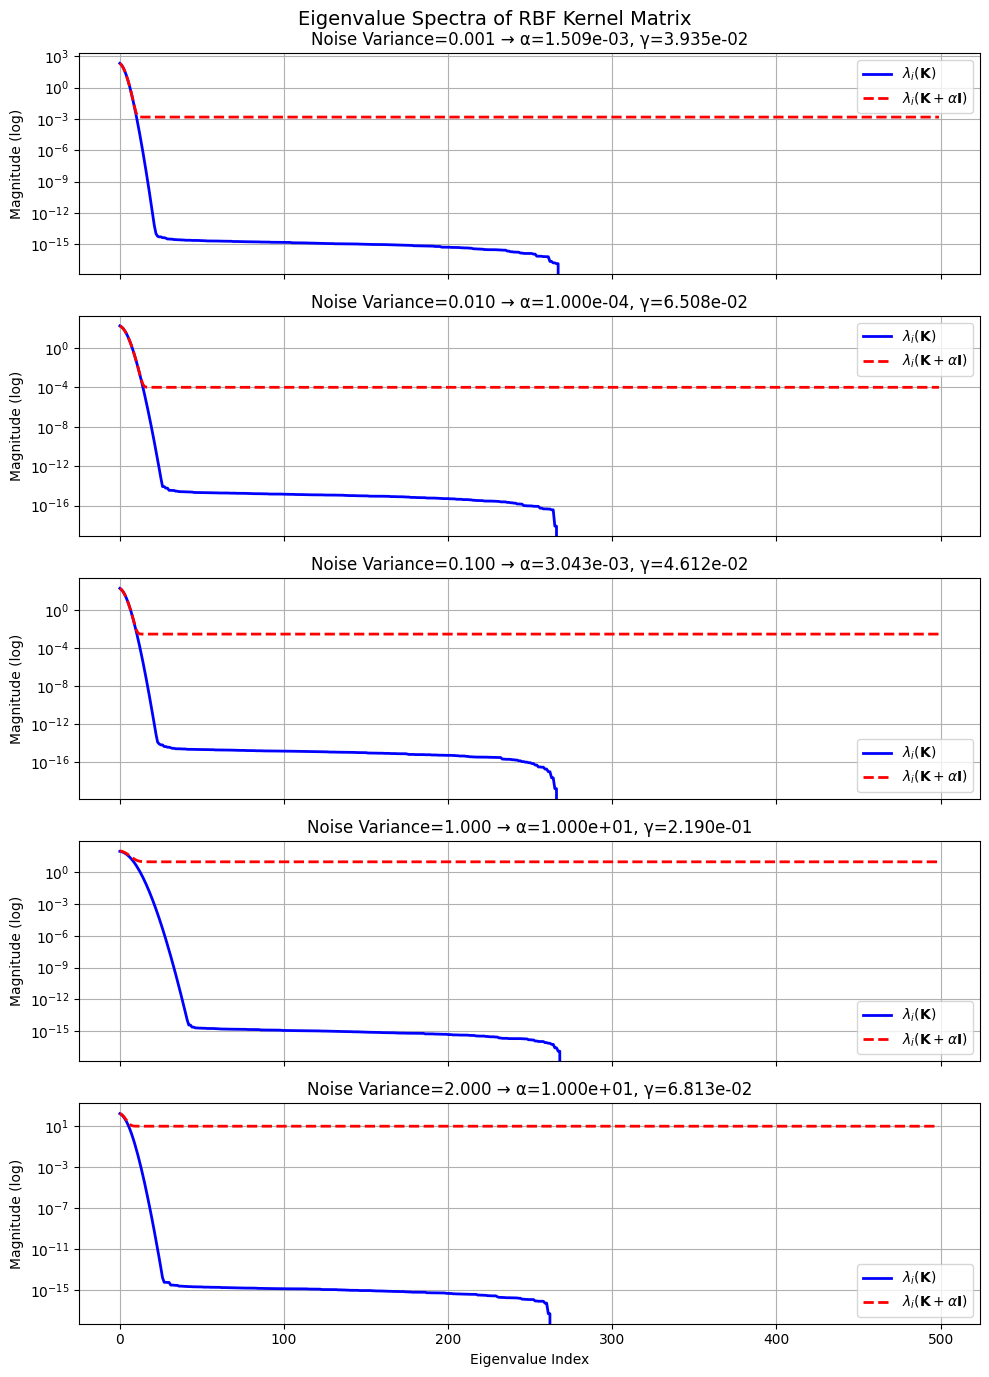

In [77]:
# Library Import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from numpy.linalg import eig # Corrected import

# Data Generation
def generateData(N=500, var=1.0, seed=0):
  np.random.seed(seed)
  X = np.linspace(-3*np.pi, 3*np.pi, N).reshape(-1, 1)
  y = np.sinc(X / np.pi).ravel()
  noise = np.sqrt(var) * np.random.randn(N)
  yn = y + noise
  return X, y, yn

# Kernel Matrix Construction
def rbfKernel(X, gamma):
  sq_dists = (X - X.T)**2
  return np.exp(-gamma * sq_dists)

# Data Visualization
def visualizeNoiseLevels(vars_noise):
  fig, axes = plt.subplots(len(vars_noise), 1, figsize=(10, 12), sharex=True)

  for i, var in enumerate(vars_noise):
    X, y, yn = generateData(var=var, seed=42)

    axes[i].plot(X, yn, '.', alpha=0.5, label=f'var={var}', color='black')
    axes[i].plot(X, y, 'r-', linewidth=2, label='sinc(x)')
    axes[i].set_ylabel('f(x)')
    axes[i].legend()
    axes[i].grid(True)

    if i == len(vars_noise) - 1:
      axes[i].set_xlabel('x')

  fig.suptitle('Data with Different Noise Levels', fontsize=14)
  plt.tight_layout()
  plt.show()

# Predictions Visualization
def plotKRRSolutionsGrid(vars_noise=[0.001, 0.01, 0.1, 1.0, 2.0]):
  # Hyparameters Grid
  param_grid = {
        'alpha': np.logspace(-4, 1, 10),
        'gamma': np.logspace(-3, 2, 10)
  }

  fig, axes = plt.subplots(len(vars_noise), 1, figsize=(10, 14), sharex=True)

  for i, var in enumerate(vars_noise):
    X, y, yn = generateData(var=var, seed=42)
    X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.3, random_state=42)

    # --- Grid Search ---
    model = GridSearchCV(
            KernelRidge(kernel='rbf'),
            param_grid,
            scoring='neg_mean_squared_error',
            cv=5
    )
    model.fit(X_train, y_train)

    # Best Hyperparameters
    best_alpha = model.best_params_['alpha']
    best_gamma = model.best_params_['gamma']
    print(f"Noise Variance={var:.3f} → α={best_alpha:.3e}, γ={best_gamma:.3e}")

    # --- Prediction ---
    y_pred = model.predict(X)
    mse = mean_squared_error(yn, y_pred)

    # --- Graphs ---
    axes[i].plot(X, y, 'r-', lw=2, label='Sinc(x) Function')
    axes[i].plot(X, y_pred, 'b-', lw=2, label='KRR Prediction')
    axes[i].set_ylabel('f(x)')
    axes[i].grid(True)
    axes[i].legend()
    axes[i].set_title(f"Noise Variance={var:.3f} | α={best_alpha:.2e}, γ={best_gamma:.2e} | RMSE={np.sqrt(mse):.3f}")

    if i == len(vars_noise) - 1:
      axes[i].set_xlabel('x')

  fig.suptitle("Kernel Ridge Solutions (RBF) for Different Noise Levels - GridSearchCV", fontsize=14)
  plt.tight_layout()
  plt.show()

def plotKRRSolutionsBayes(vars_noise=[0.001, 0.01, 0.1, 1.0, 2.0]):
  fig1, axes1 = plt.subplots(len(vars_noise), 1, figsize=(10, 14), sharex=True)
  fig2, axes2 = plt.subplots(len(vars_noise), 1, figsize=(10, 14), sharex=True)

  for i, var in enumerate(vars_noise):
    X, y, yn = generateData(var=var, seed=42)
    X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.3, random_state=42)

    # --- Bayessian Search ---
    model = BayesSearchCV(
    KernelRidge(kernel='rbf'),
    {
        'alpha': (1e-4, 1e1, 'log-uniform'),
        'gamma': (1e-3, 1e2, 'log-uniform')
    },
    n_iter=25,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
    )

    # Fitting
    model.fit(X_train, y_train)

    # Best Hyperparameters
    bestAlpha = model.best_params_['alpha']
    bestGamma = model.best_params_['gamma']
    print(f"Noise Variance={var:.3f} → α={bestAlpha:.3e}, γ={bestGamma:.3e}")

    # --- Prediction ---
    y_pred = model.predict(X)
    mse = mean_squared_error(yn, y_pred)

    # --- Graphs ---
    axes1[i].plot(X, y, 'r-', lw=2, label='Sinc(x) Function')
    axes1[i].plot(X, y_pred, 'b-', lw=2, label='KRR Prediction')
    axes1[i].set_ylabel('f(x)')
    axes1[i].grid(True)
    axes1[i].legend()
    axes1[i].set_title(f"Noise Variance={var:.3f} | α={bestAlpha:.2e}, γ={bestGamma:.2e} | RMSE={np.sqrt(mse):.3f}")

    if i == len(vars_noise) - 1:
      axes1[i].set_xlabel('x')

    # Kernel Matrix Reconstruction
    K = rbfKernel(X, bestGamma)
    K_reg = K + bestAlpha * np.eye(len(K))

    # Singular Value Decomposition
    eigvals_K, eigvecs_K = eig(K)
    eigvals_K_reg, eigvecs_K_reg = eig(K_reg)

    eigvals_K = np.sort(np.real(eigvals_K))[::-1]
    eigvals_K_reg = np.sort(np.real(eigvals_K_reg))[::-1]

    # SVD Spectra Visualization
    ax = axes2[i]
    ax.semilogy(eigvals_K, 'b-', lw=2, label=r'$\lambda_i(\mathbf{K})$')
    ax.semilogy(eigvals_K_reg, 'r--', lw=2, label=r'$\lambda_i(\mathbf{K}+\alpha \mathbf{I})$')
    ax.grid(True)
    ax.legend()
    ax.set_ylabel('Magnitude (log)')
    ax.set_title(f"Noise Variance={var:.3f} → α={bestAlpha:.3e}, γ={bestGamma:.3e}")

    if i == len(vars_noise) - 1:
      ax.set_xlabel('Eigenvalue Index')

  fig1.suptitle("Kernel Ridge Solutions (RBF) for Different Noise Levels - BayesSearchCV", fontsize=14)
  fig2.suptitle("Eigenvalue Spectra of RBF Kernel Matrix", fontsize=14)
  plt.tight_layout()
  plt.show()

# --- Main ---
vars_noise = [0.001, 0.01, 0.1, 1.0, 2.0]
visualizeNoiseLevels(vars_noise)
plotKRRSolutionsGrid()
plotKRRSolutionsBayes()

**Observaciones:**

Los modelos que nacen de datos con una mayor dispersión generan una peor predicción de la forma analítica de la función sinc, esto se conecta no solo desde el análisis visual y la evaluación de su función de costo final (RMSE), sino desde el espectro de valores propios de la matriz kernel resultante.

Se evidencia cómo aquellos modelos que poseen una mayor dispersión intrínseca son capados a valores más altos de valores propios dada una mayor regularización, dictada por el parámetro $\alpha$.

Un parámetro $\alpha$ mayor indica una mayor regularización en la constitución del modelo y por ende, una peor generalización de la función sinc, en comparación con su versión analítica.